Vamos a usar la función $f(x) = x^2$ que es diferenciable con derivada $f'(x) = 2x$. Esta función tiene un mínimo global en $x = 0$ con $f(0) = 0$.


## **Funciones**


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")


f = lambda x: x**2
df = lambda x: 2 * x


x0 = 5.0
print(f"Punto inicial: x0 = {x0}")
print(f"f(x0) = {f(x0)}")

Punto inicial: x0 = 5.0
f(x0) = 25.0


La actualización del descenso de gradiente es:
$$x_{k+1} = x_k - \eta \cdot f'(x_k)$$

donde $\eta > 0$ es la tasa de aprendizaje.


In [7]:
def gradient_descent(f, df, x0, eta, max_iter=100, tol=1e-6):
    x = x0
    trajectory = [x]

    for i in range(max_iter):
        grad = df(x)

        x_new = x - eta * grad
        trajectory.append(x_new)

        if abs(x_new - x) < tol:
            return x_new, trajectory, True

        x = x_new
    return x, trajectory, False

### Caso 1: $\eta_1 = 0.3$ (converge a mínimo)

Para $f(x) = x^2$ con $f'(x) = 2x$, la actualización es:
$$x_{k+1} = x_k - \eta \cdot 2x_k = x_k(1 - 2\eta)$$

Para que converja, necesitamos $|1 - 2\eta| < 1$, es decir, $0 < \eta < 1$.

Con $\eta_1 = 0.3$: $|1 - 0.6| = 0.4 < 1$ ✓ **Converge**


In [8]:
eta1 = 0.3
x_final1, traj1, converged1 = gradient_descent(f, df, x0, eta1, max_iter=100)

print(f"η₁ = {eta1}")
print(f"Punto inicial: x₀ = {x0}")
print(f"Punto final: x = {x_final1:.10f}")
print(f"f(x) = {f(x_final1):.10f}")
print(f"Convergió: {converged1}")
print(f"Número de iteraciones: {len(traj1)-1}\n")
eta1 = 0.3
x_final1, traj1, converged1 = gradient_descent(f, df, x0, eta1, max_iter=100)


iterations = list(range(min(10, len(traj1))))
x_values = traj1[:10]
f_values = [f(x) for x in x_values]
df_iterations = pd.DataFrame({"Iteration": iterations, "x": x_values, "f(x)": f_values})
print(df_iterations)

η₁ = 0.3
Punto inicial: x₀ = 5.0
Punto final: x = 0.0000003436
f(x) = 0.0000000000
Convergió: True
Número de iteraciones: 18

   Iteration         x       f(x)
0          0  5.000000  25.000000
1          1  2.000000   4.000000
2          2  0.800000   0.640000
3          3  0.320000   0.102400
4          4  0.128000   0.016384
5          5  0.051200   0.002621
6          6  0.020480   0.000419
7          7  0.008192   0.000067
8          8  0.003277   0.000011
9          9  0.001311   0.000002


La sucesión de iterados es:
$$x_k = x_0 \cdot (1 - 2\eta_1)^k = 5 \cdot (1 - 0.6)^k = 5 \cdot (0.4)^k$$

Como $|0.4| < 1$, tenemos:
$$\lim_{k \to \infty} x_k = 5 \cdot \lim_{k \to \infty} (0.4)^k = 5 \cdot 0 = 0$$

Por lo tanto, **el método converge al mínimo** $x^* = 0$.


### Caso 2: $\eta_2 = 1.2$ (no converge)

Con $\eta_2 = 1.2$: $|1 - 2.4| = |-1.4| = 1.4 > 1$ ✗ **No converge (diverge u oscila)**


In [9]:
eta2 = 1.2
x_final2, traj2, converged2 = gradient_descent(f, df, x0, eta2, max_iter=50)

print(f"η₂ = {eta2}")
print(f"Punto inicial: x₀ = {x0}")
print(f"Punto final: x = {x_final2:.10f}")
print(f"f(x) = {f(x_final2):.10f}")
print(f"Convergió: {converged2}")
print(f"Número de iteraciones: {len(traj2)-1}\n")

iterations = list(range(min(10, len(traj2))))
x_values = traj2[:10]
f_values = [f(x) for x in x_values]
df_iterations2 = pd.DataFrame(
    {"Iteration": iterations, "x": x_values, "f(x)": f_values}
)
print(df_iterations2)

η₂ = 1.2
Punto inicial: x₀ = 5.0
Punto final: x = 101244581.1988216341
f(x) = 10250465222124788.0000000000
Convergió: False
Número de iteraciones: 50

   Iteration           x          f(x)
0          0    5.000000     25.000000
1          1   -7.000000     49.000000
2          2    9.800000     96.040000
3          3  -13.720000    188.238400
4          4   19.208000    368.947264
5          5  -26.891200    723.136637
6          6   37.647680   1417.347809
7          7  -52.706752   2778.001706
8          8   73.789453   5444.883345
9          9 -103.305234  10671.971355


La sucesión de iterados es:
$$x_k = x_0 \cdot (1 - 2\eta_2)^k = 5 \cdot (1 - 2.4)^k = 5 \cdot (-1.4)^k$$

Como $|-1.4| = 1.4 > 1$, tenemos:

- Los valores oscilan en signo (por el factor negativo $-1.4$)
- Los valores crecen en magnitud: $|x_k| = 5 \cdot (1.4)^k \to \infty$

Por lo tanto, **el método diverge con oscilación** (los valores alternan de signo y crecen en magnitud).


## **Visualizacion**


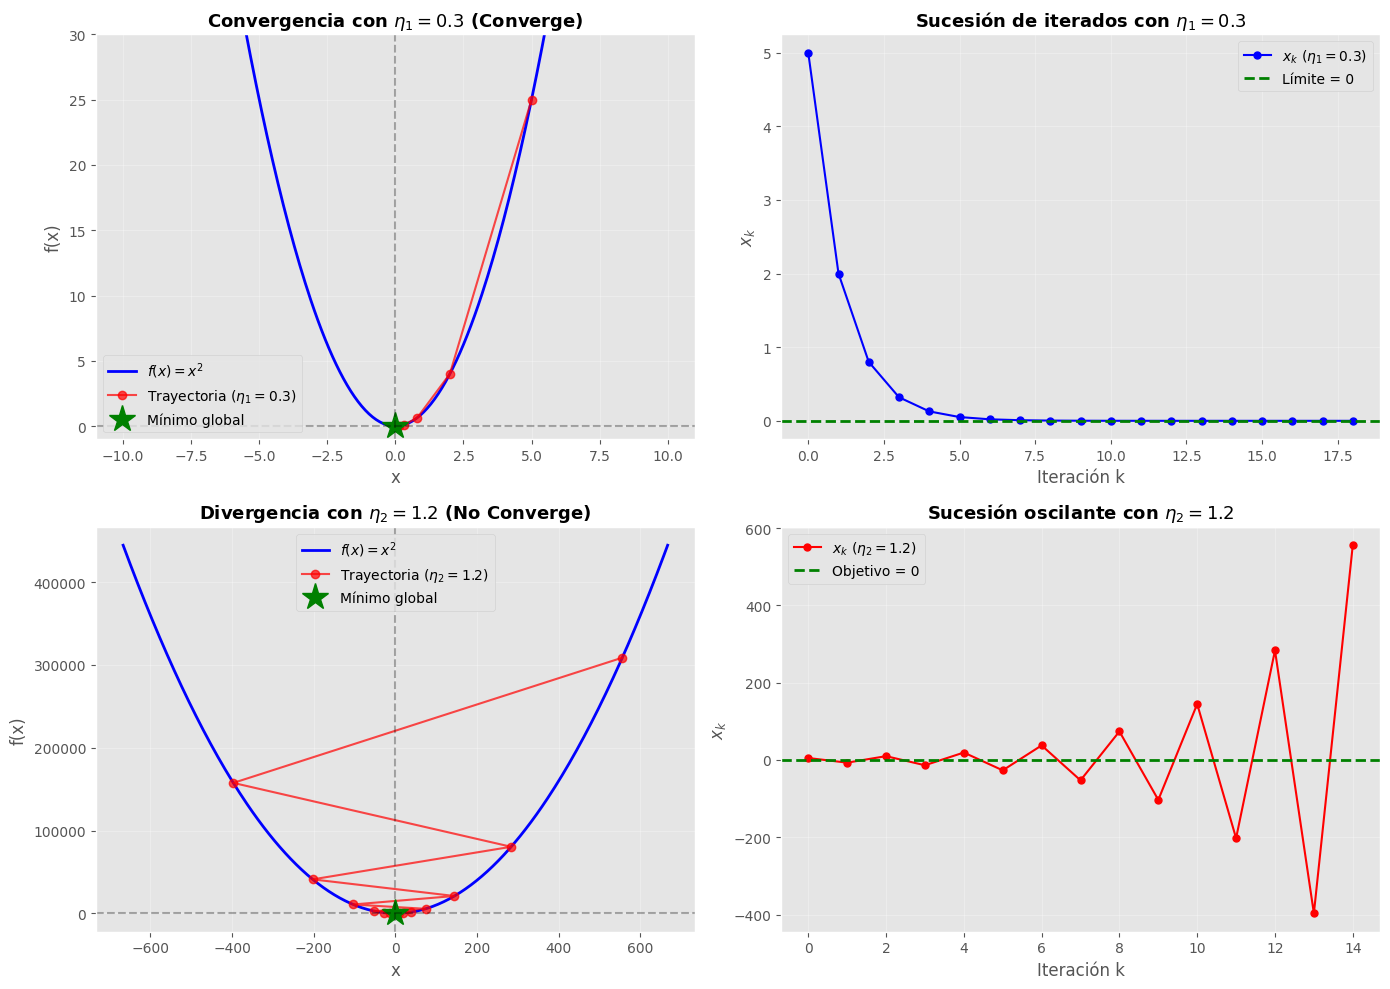

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

x_range = np.linspace(-10, 10, 300)
y_range = f(x_range)

ax1 = axes[0, 0]
ax1.plot(x_range, y_range, "b-", linewidth=2, label="$f(x) = x^2$")
ax1.plot(
    traj1,
    [f(x) for x in traj1],
    "ro-",
    markersize=6,
    linewidth=1.5,
    label=f"Trayectoria ($\\eta_1 = {eta1}$)",
    alpha=0.7,
)
ax1.plot(0, 0, "g*", markersize=20, label="Mínimo global")
ax1.axhline(y=0, color="k", linestyle="--", alpha=0.3)
ax1.axvline(x=0, color="k", linestyle="--", alpha=0.3)
ax1.set_xlabel("x", fontsize=12)
ax1.set_ylabel("f(x)", fontsize=12)
ax1.set_title(
    f"Convergencia con $\\eta_1 = {eta1}$ (Converge)", fontsize=13, fontweight="bold"
)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1, 30)

ax2 = axes[0, 1]
iterations1 = range(len(traj1))
ax2.plot(
    iterations1,
    traj1,
    "bo-",
    markersize=5,
    linewidth=1.5,
    label=f"$x_k$ ($\\eta_1 = {eta1}$)",
)
ax2.axhline(y=0, color="g", linestyle="--", linewidth=2, label="Límite = 0")
ax2.set_xlabel("Iteración k", fontsize=12)
ax2.set_ylabel("$x_k$", fontsize=12)
ax2.set_title(
    f"Sucesión de iterados con $\\eta_1 = {eta1}$", fontsize=13, fontweight="bold"
)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
traj2_limited = traj2[: min(15, len(traj2))]
x_max = max(abs(min(traj2_limited)), abs(max(traj2_limited))) * 1.2
x_range2 = np.linspace(-x_max, x_max, 300)
y_range2 = f(x_range2)
ax3.plot(x_range2, y_range2, "b-", linewidth=2, label="$f(x) = x^2$")
ax3.plot(
    traj2_limited,
    [f(x) for x in traj2_limited],
    "ro-",
    markersize=6,
    linewidth=1.5,
    label=f"Trayectoria ($\\eta_2 = {eta2}$)",
    alpha=0.7,
)
ax3.plot(0, 0, "g*", markersize=20, label="Mínimo global")
ax3.axhline(y=0, color="k", linestyle="--", alpha=0.3)
ax3.axvline(x=0, color="k", linestyle="--", alpha=0.3)
ax3.set_xlabel("x", fontsize=12)
ax3.set_ylabel("f(x)", fontsize=12)
ax3.set_title(
    f"Divergencia con $\\eta_2 = {eta2}$ (No Converge)", fontsize=13, fontweight="bold"
)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
iterations2 = range(len(traj2_limited))
ax4.plot(
    iterations2,
    traj2_limited,
    "ro-",
    markersize=5,
    linewidth=1.5,
    label=f"$x_k$ ($\\eta_2 = {eta2}$)",
)
ax4.axhline(y=0, color="g", linestyle="--", linewidth=2, label="Objetivo = 0")
ax4.set_xlabel("Iteración k", fontsize=12)
ax4.set_ylabel("$x_k$", fontsize=12)
ax4.set_title(
    f"Sucesión oscilante con $\\eta_2 = {eta2}$", fontsize=13, fontweight="bold"
)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("gradient_descent_comparison.png", dpi=150, bbox_inches="tight")
plt.show()